***Mô hình ARIMA tổng hợp ngày 20/06/2021***

Khai báo thư viện cơ bản

In [31]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

Input dữ liệu

In [30]:
stock_prices_1 = pd.read_csv("VCB_Stock_Price.csv")
stock_prices = stock_prices_1[['Date', 'Close']]
stock_prices = stock_prices.set_index("Date")


Chia tập train, test

In [3]:
train=stock_prices.iloc[:600]
test=stock_prices.iloc[600:]
print("Kích thước tập ban đầu là: ",stock_prices.shape)
print("Kích thước tập huấn luyện là: ",train.shape)
print("Kích thước tập thử nghiệm là: ",test.shape)

Kích thước tập ban đầu là:  (818, 1)
Kích thước tập huấn luyện là:  (600, 1)
Kích thước tập thử nghiệm là:  (218, 1)


**Vẽ đồ thị khảo sát dữ liệu**

Đồ thị giá

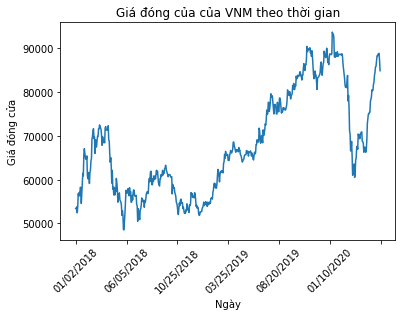

In [4]:
train["Close"].plot(title="Giá đóng của của VNM theo thời gian", rot=45)
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa")
plt.show();

Đồ thị xu hướng

In [5]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


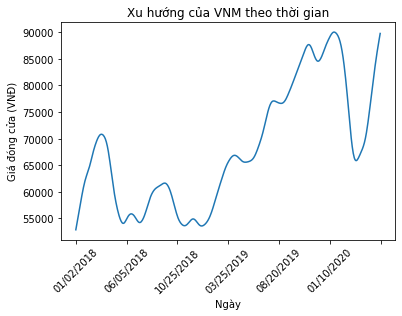

In [6]:
ts_noise, ts_trend = sm.tsa.filters.hpfilter(train['Close'])
ts_trend.plot(title= "Xu hướng của VNM theo thời gian", rot=45)
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa (VNĐ)")
plt.show()

Đồ thị giá và xu hướng

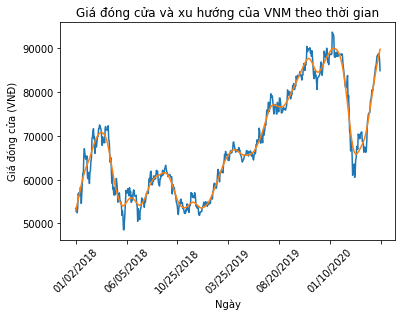

In [7]:
train["Close"].plot(rot=45)
ts_trend.plot(title= "Giá đóng cửa và xu hướng của VNM theo thời gian", rot=45)
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa (VNĐ)")
plt.show()

Đồ thị nhiễu

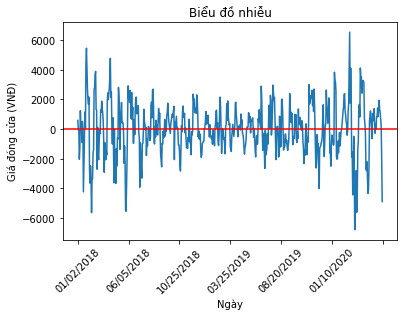

In [8]:
ts_noise.plot(title = "Biểu đồ nhiễu", rot=45 )
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa (VNĐ)")
plt.axhline(y=0, label='mean return', c='red')
plt.show()

Đồ thị kết hợp giá - xu hướng - nhiễu

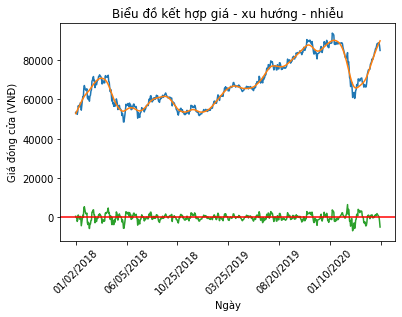

In [9]:
train["Close"].plot(rot=45)
ts_trend.plot(rot=45)
ts_noise.plot(title = "Biểu đồ kết hợp giá - xu hướng - nhiễu", rot=45 )
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa (VNĐ)")
plt.axhline(y=0, label='mean return', c='red')
plt.show()

Kiểm tra tính dừng của dữ liệu bằng thống kê Dickey – Fuller mở rộng (**ADF test**)

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
result = adfuller(train['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.312868
p-value: 0.623265
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


Vì **p-value > 0.05** nên chuỗi thời gian không dừng

Autocorrelation Function (ACF)

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

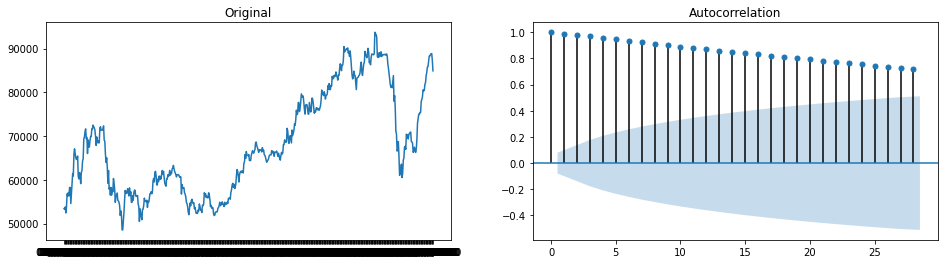

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,4))
ax1.plot(train["Close"])
ax1.set_title("Original")

plot_acf(train["Close"], ax = ax2);

cách 1 kiểm tra số lần sai phân

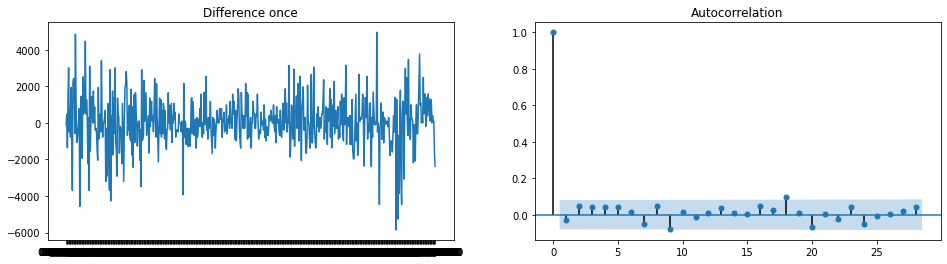

In [14]:
diff = train["Close"].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2 , figsize = (16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

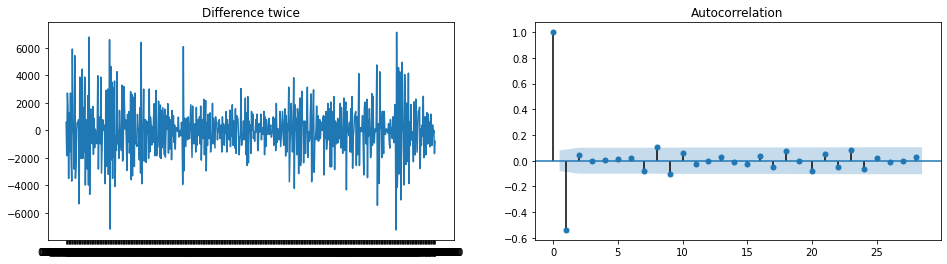

In [15]:
diff = train["Close"].diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2 , figsize = (16,4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff, ax=ax2);

cách 2 kiểm tra số lần sai phân (sử dụng thư viện)

In [16]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.3MB/s 
     |████████████████████████████████| 9.5MB 21.7MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [17]:
from pmdarima.arima.utils import ndiffs

In [18]:
ndiffs(train["Close"], test = "adf")

1

**Tìm p**

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf

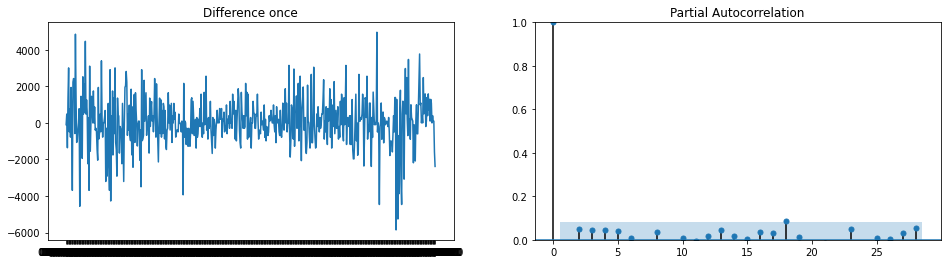

In [20]:
diff = train["Close"].diff().dropna()

diff = train["Close"].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2 , figsize = (16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

**Tìm q**

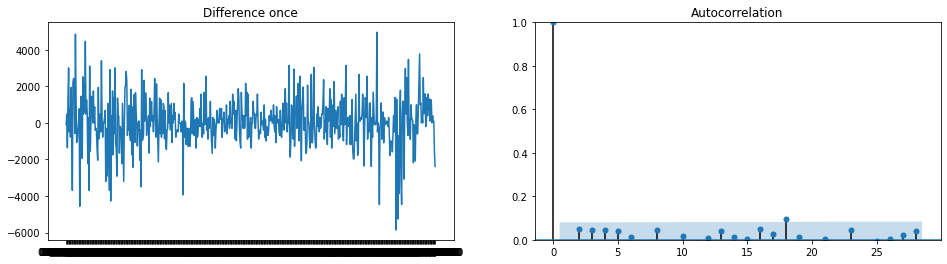

In [21]:
diff = train["Close"].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2 , figsize = (16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

In [22]:
q = 3

Huấn luyện mô hình
(5,1,3)

In [23]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train["Close"], order = (5,1,3))
result = model.fit(disp = 0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  try:
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  try:
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  Inverse of the Jones reparameterization
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  Invers

In [24]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  599
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -5151.857
Method:                       css-mle   S.D. of innovations           1314.255
Date:                Sun, 18 Jul 2021   AIC                          10323.714
Time:                        00:19:43   BIC                          10367.667
Sample:                             1   HQIC                         10340.826
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            52.0195     57.484      0.905      0.366     -60.647     164.686
ar.L1.D.Close     0.7764      0.128      6.062      0.000       0.525       1.027
ar.L2.D.Close     0.6296      0.208     

In [25]:
step = 218

fc, se, conf = result.forecast(step)

In [33]:
fc = pd.Series(fc, index = test[:step].index)
lower = pd.Series(conf[:, 0], index=test[:step].index)
upper = pd.Series(conf[:, 1], index=test[:step].index)

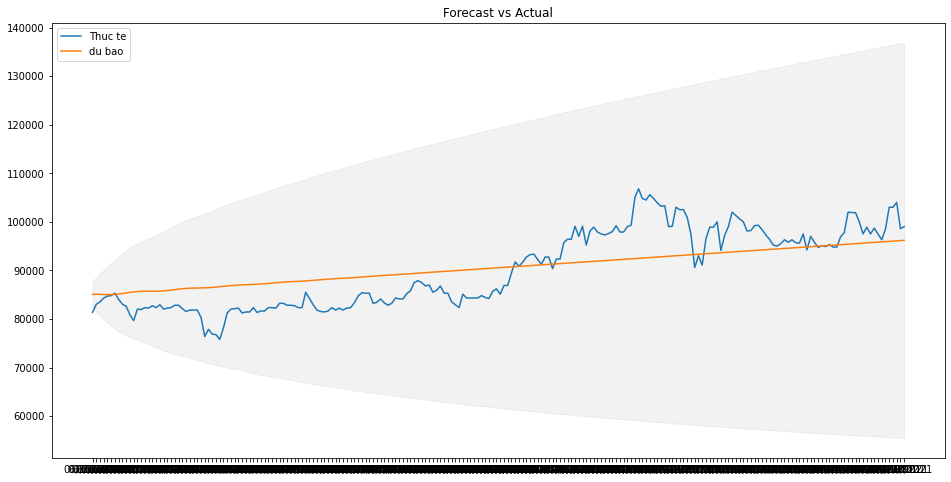

In [27]:
plt.figure(figsize=(16,8))
plt.plot(test[:step], label ="Thuc te")
plt.plot(fc, label="du bao")
plt.fill_between(lower.index, lower, upper, color ="k", alpha = 0.05)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")